<a href="https://colab.research.google.com/github/Sa-Fi/Convolutional-Neural-Network-project-/blob/main/Brain_tumor_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#upload the kaggle json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 97% 84.0M/86.8M [00:02<00:00, 42.3MB/s]
100% 86.8M/86.8M [00:02<00:00, 32.8MB/s]


In [ ]:
# unzip the file
import zipfile
zip_ref = zipfile.ZipFile('/content/brain-tumor-classification-mri.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!ls

brain-tumor-classification-mri.zip  kaggle.json  sample_data  Testing  Training


In [ ]:
#import all the necessary libraries
import os # for accessing the files
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # visualize and process the image
import cv2 # open cv
from google.colab.patches import cv2_imshow # per cell e img show korar jnno within this window
from PIL import Image #read images and do some processes on it
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf

In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

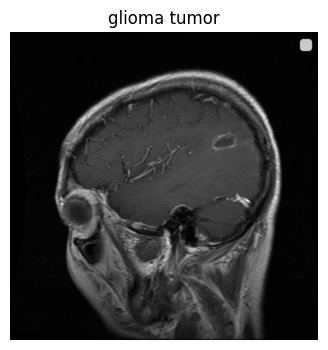

In [ ]:
plt.figure(figsize=(4,4))
img = mpimg.imread('/content/Training/glioma_tumor/gg (241).jpg')
plt.imshow(img)
plt.axis('off')
plt.title("glioma tumor")
plt.legend()
plt.show()

In [ ]:
glioma_testing_path = '/content/Testing/glioma_tumor/'

x = []
y = []

for img_file in os.listdir(glioma_testing_path):

  image = Image.open(glioma_testing_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  x.append(image)
  y.append(0)



glioma_training_path = '/content/Training/glioma_tumor/'

for img_file in os.listdir(glioma_training_path):

  image = Image.open(glioma_training_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  x.append(image)
  y.append(0)


meningioma_testing_path = '/content/Testing/meningioma_tumor/'

for img_file in os.listdir(meningioma_testing_path):

  image = Image.open(meningioma_testing_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  x.append(image)
  y.append(1)



meningioma_training_path = '/content/Training/meningioma_tumor/'

for img_file in os.listdir(meningioma_training_path):

  image = Image.open(meningioma_training_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  x.append(image)
  y.append(1)


notumor_testing_path = '/content/Testing/no_tumor/'

for img_file in os.listdir(notumor_testing_path):

  image = Image.open(notumor_testing_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  x.append(image)
  y.append(2)


notumor_training_path = '/content/Training/no_tumor/'

for img_file in os.listdir(notumor_training_path):

  image = Image.open(notumor_training_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  x.append(image)
  y.append(2)

pituitary_testing_path = '/content/Testing/pituitary_tumor/'

for img_file in os.listdir(pituitary_testing_path):

  image = Image.open(pituitary_testing_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  x.append(image)
  y.append(3)

pituitary_training_path = '/content/Training/pituitary_tumor/'

for img_file in os.listdir(pituitary_training_path):

  image = Image.open(pituitary_training_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  x.append(image)
  y.append(3)

print("lenght of x ",len(x))
print("lenght of y ",len(y))

lenght of x  3264
lenght of y  3264


In [ ]:
x = np.array(x)
y = np.array(y)

<ipython-input-9-eab93f439266>:1: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  x = np.array(x)
<ipython-input-9-eab93f439266>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x)


In [ ]:
# split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 101)

In [ ]:
from keras.models import Sequential
from keras.layers  import Conv2D,Flatten,Dropout,Dense,MaxPooling2D

In [ ]:

model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (128,128,3)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))


model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        36928     
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs = 20,validation_split =0.1)

ValueError: ignored